## Imports

In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt

## Import arrays from .json files

Results for calculations done in Cairo and in Python are each in two separate .json files

In [13]:
# Fixed point math constants
SCALE_FP = 10**20

# Constants for felts
PRIME = 3618502788666131213697322783095070105623107215331596699973092056135872020481
HALF_PRIME = (
    1809251394333065606848661391547535052811553607665798349986546028067936010240
)

# Cairo-calculated data
with open('test_projectile_plot_cairo.json') as json_file_cairo:
    data_cairo = json.load(json_file_cairo)
    
    # Position coordinate arrays
    x_s_cairo_fp_felt = np.array(data_cairo[0])
    y_s_cairo_fp_felt = np.array(data_cairo[1])
    
    # Find num_pts = array length 
    num_pts = len(x_s_cairo)
    # Declare empty arrays with dimensions
    x_s_cairo = np.empty(num_pts)
    y_s_cairo = np.empty(num_pts)
    
    for p in range(0, num_pts):

        if x_s_cairo_fp_felt[p] <= HALF_PRIME:
            x_s_cairo[p] = x_s_cairo_fp_felt[p] / SCALE_FP
        else:
            x_s_cairo[p] = (x_s_cairo_fp_felt[p] - PRIME) / SCALE_FP

        if y_s_cairo_fp_felt[p] <= HALF_PRIME:
            y_s_cairo[p] = y_s_cairo_fp_felt[p] / SCALE_FP
        else:
            y_s_cairo[p] = (y_s_cairo_fp_felt[p] - PRIME) / SCALE_FP

# Python-calculated data
with open('test_projectile_plot_python.json') as json_file_python:
    data_python = json.load(json_file_python)

    # Position coordinate arrays
    x_s_python = np.array(data_python[0])
    y_s_python = np.array(data_python[1])

## Create plots

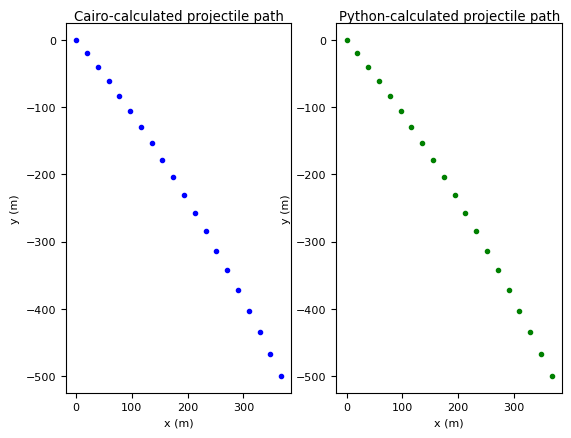

In [14]:
# Create a Figure 'fig' and Axes 'ax'. 
# Subplots args included (nrows, ncols)
fig, ax_s = plt.subplots(1,2)

# Reduce default font size for plots
plt.rcParams.update({'font.size':8})
            
# Create plot titles
title_str_cairo = 'Cairo-calculated projectile path'
title_str_python = 'Python-calculated projectile path'

# Axes title (reduce pad from default of 6)
ax_s[0].set_title(title_str_cairo, pad=2)
ax_s[1].set_title(title_str_python, pad=2)

# Axes labels
ax_s[0].set_xlabel('x (m)')
ax_s[0].set_ylabel('y (m)')
ax_s[1].set_xlabel('x (m)')
ax_s[1].set_ylabel('y (m)')

# Ranges of axes
#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)

# Grid lines
#plt.grid()
    
ax_s[0].plot(x_s_cairo, y_s_cairo, 'b.')
ax_s[1].plot(x_s_python, y_s_python, 'g.')

plt.show()